In [2]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression 
import time
import matplotlib.pyplot as plt
#from mylib import *
import statsmodels.api as sm
import random

In [4]:
def getYhat(X,betas):
    yhat=np.zeros(X.shape[0])
    for v,beta in zip(X, betas):
        #print(beta, v)
        yhat+=X[v]*beta
    return yhat
class LinReg:
    def __init__(self,df,toDrop=None):
        self.df=df#pd.read_pickle(dataFn)
        self.nobs=self.df.shape[0]
        if toDrop!=None:
            for v in toDrop:
                del self.df[v]       

    def fit(self, iy, iXs, toPrint=False):
        assert iy not in iXs, 'LHS variable found in the RHS list'
        if type(iy)==int:
            iy = list([iy])
        self.iy=iy
        self.RHS=list(self.df.columns[list(iXs)])
        self.LHS=list(self.df.columns[list(iy)])
        y = self.df[self.LHS].squeeze()
        X1=self.df[self.RHS]    
        self.nRHS=len(self.RHS)-1
        XX=X1.T.dot(X1)
        XY=X1.T.dot(y)
        self.Coef=(np.matrix(XX).I.dot(XY)).tolist()[0]
        yhat=getYhat(X1,self.Coef)
        self.ymean=np.mean(y)
        self.SST=(y-self.ymean).dot(y-self.ymean)
        self.SSE=(yhat-self.ymean).dot(yhat-self.ymean)
        self.R2=self.SSE/self.SST
        self.adjR2=1-(1-self.R2)*(self.nobs-1)/(self.nobs-self.nRHS-1)
        self.MSE= (yhat-y).dot(yhat-y)/self.nobs

        self.AIC = self.nobs*(1+np.log(2*np.pi))/2 +self.nobs*np.log(self.MSE)/2 + (len(iXs)+2)
        self.BIC = self.nobs*(1+np.log(2*np.pi))/2 +self.nobs*np.log(self.MSE)/2 + np.log(self.nobs)*(len(iXs)+2)/2
    
    def columns(self):
        return list(self.df.columns)
    def Yhat(self):
        return self.df[self.RHS].dot(self.Coef)
    
    def __repr__(self):
        s='--------------------OLS -----------------------\n'
        s+='nObs'.ljust(10)+str(self.nobs).rjust(10)+'    '
        s+='nRegressor'.ljust(10)+str(self.nRHS).rjust(10)+'\n'
        s+='SST'.ljust(10)+('%.3f' % self.SST).rjust(10)+'    '
        s+='SSE'.ljust(10)+('%.3f' % self.SSE).rjust(10)+'\n'
        s+='R2'.ljust(10)+('%.3f' % self.R2).rjust(10)+'    '
        s+='adjR2'.ljust(10)+('%.3f' % self.adjR2).rjust(10)+'\n'
        s+='MSE'.ljust(10)+('%.3f' % self.MSE).rjust(10)+'    '
        s+='RMSE'.ljust(10)+('%.3f' % np.sqrt(self.MSE)).rjust(10)+'\n'  
        s+='-----------------------------------------------\n'
        for v, beta in zip(self.RHS, self.Coef):
            s+=v.ljust(14)+('%.4f' % beta).rjust(12)+'\n'
        s+='----------------------------\n'
        return s

    #def getYhat(self):
        #return getYhat(self.df[self.RHS],self.Coef)

df = pd.read_pickle('auto_processed.zip')
lm = LinReg(df, toDrop=['make','foreign', 'rep78'])
print(lm.columns())
lm.fit(2,[0,3,4,5])
lm

['one', 'price', 'mpg', 'headroom', 'trunk', 'weight', 'length', 'turn', 'displacement', 'gear_ratio', 'iForeign', 'rep_2', 'rep_3', 'rep_4', 'rep_5']


--------------------OLS -----------------------
nObs              69    nRegressor         3
SST         2340.203    SSE         1526.106
R2             0.652    adjR2          0.636
MSE           11.799    RMSE           3.435
-----------------------------------------------
one                39.4842
headroom            0.1442
trunk              -0.1173
weight             -0.0056
----------------------------

In [6]:
def genData(n=100,p=5,sig=1.0):
    X = np.random.normal(0,2.0,size=(n,p))
    Y = 2.0+X.dot([0.5,1.0,1.5]+[0.0 for i in range(p-3)])+sig*np.random.normal(size=n)
    df = pd.DataFrame(X,columns=[f"X{i+1}" for i in range(p)])
    df.insert(0,"one",1.0) #最前面插入intercept
    df.insert(p+1,"Y",Y) #插入target
    return df
print(genData(n=100,p=5))

    one        X1        X2        X3        X4        X5          Y
0   1.0 -1.499012 -2.616037 -0.430007  1.557929 -0.562119  -3.479007
1   1.0  3.665444  0.454899 -3.073947  4.389851 -0.791882  -0.189999
2   1.0 -0.331101  0.437998  1.335461 -0.747531  0.841548   5.267580
3   1.0  0.393336 -1.042896  1.534133 -1.296232  0.249732   3.207406
4   1.0  0.789263  0.867373 -0.107320 -0.228491  3.324518   3.718391
..  ...       ...       ...       ...       ...       ...        ...
95  1.0  5.414275 -1.490788 -0.274004  2.708910 -1.918421   3.174241
96  1.0 -2.210257 -2.173721  4.958758 -0.583928  4.028778   5.338248
97  1.0  1.535596  4.801359  4.929688 -1.361573 -3.515050  14.116430
98  1.0 -0.352019 -2.738777  3.062350 -0.107419  1.222129   3.015799
99  1.0  1.467246  0.445143  1.396358 -1.830006  0.989330   5.691365

[100 rows x 7 columns]


In [8]:
n = 1000
p = 3
df = genData(n=n,p=p,sig=2)
lm1 = LinReg(df)
lm1.fit(p+1,[0,1,2])
lm1.Coef
lm1.MSE

13.3906159746044

In [10]:
lm2 = LinReg(df)
lm2.fit(p+1,[i for i in range(p+1)])
lm2.Coef
lm2.Coef[:5]

[1.9112392187229745, 0.4702896654610737, 0.936426356011352, 1.530677508964375]

###### What is the problem if we select too many covariates?

In [12]:
nRep = 200
res = np.zeros((nRep,9))
n = 100
p = 60
df = genData(n=n,p=p,sig=4.0)
beta1 = np.zeros((nRep,4))
beta2 = np.zeros((nRep,p+1))
for k in range(nRep):
    df = genData(n=n,p=p,sig=4.0)
    lm1 = LinReg(df)
    lm1.fit(p+1,[0,1,2,3])
    
    lm2 = LinReg(df)
    lm2.fit(p+1,[i for i in range(p+1)])
    beta1[k,:] = lm1.Coef
    beta2[k,:] = lm2.Coef

print("mean:")
print(beta1.mean(axis=0)[:4])
print(beta2.mean(axis=0)[:8])# unbiased estimates
print("std:")
print(beta1.std(axis=0)[:4])
print(beta2.std(axis=0)[:8]) # larger variance

mean:
[1.98212577 0.48924384 0.99766417 1.50965728]
[ 2.00038034  0.49783403  0.99870735  1.50417166  0.01417195 -0.0246925
 -0.04447782  0.02896016]
std:
[0.41571311 0.18808635 0.1980185  0.21216019]
[0.62938439 0.3064781  0.31609728 0.32215154 0.3163016  0.28336174
 0.34527638 0.3354184 ]


### Model selection

<font style='font-size:18px; line-height:24px;'>
    
- When we have many predictors (with many possible interactions), it can be difficult to find a good model.
- Which main effects do we include?
- Which interactions do we include?
- Model selection tries to “simplify” this task.

- This is an “unsolved” problem in statistics: there are no magic procedures to get you the “best model.”
- In some sense, model selection is “data mining.”
- Data miners / machine learners often work with very man

<b>Possible criteria</b>

- $R^2$: not a good criterion. Always increase with model size 
- Adjusted $R^2$: better. It “penalized” bigger models.
- Akaike’s Information Criterion (AIC) and its variation Mallow’s Cp.
- Schwarz’s BIC 
- and many more...

<b>Search strategies</b>
- “Best subset”: search all possible models and take the one with best "performance" (highest R2a or lowest Cp).
- Forward, Backward or Stepwise (forward and backward): useful when the number of predictors is large. Choose an initial model and be “greedy”.
- “Greedy” means always take the biggest jump (up or down) in your selected criterion

</font>

<b>Mallow's Cp</b>

$$ C_p = \frac{MSE_{p}}{\sigma^2} – n + 2(p+1) $$

- $MSE_{p}$: The mean of sum of squares of the residual for a model with p predictor variables
- $\sigma^2$: The residual mean square for the model (estimated by MSE of the full model)
- n: The sample size
- p: The number of predictor variables

<b>Adjusted $R^2$</b>
$$R^2_{adj}=1-\frac{n MSE_p}{(n-p-1)s_y^2}$$

<b>AIC</b>
$$AIC = \frac{n}{2}[1+\log(2\pi)] + \frac{n}{2}\log(MSE_{p}) + 1\times(p+2) $$

<b>BIC</b>
$$BIC = \frac{n}{2}[1+\log(2\pi)] + \frac{n}{2}\log(MSE_{p}) + \frac{\log n}{2}(p+2) $$

In [11]:
np.random.choice(range(1,66,1))

30

In [14]:
df = pd.read_pickle('auto_processed.zip')
lm = LinReg(df, toDrop=['make','foreign','rep78'])

In [16]:
def OLS_adjR2(lm, iy, iXs):
    lm.fit(iy,iXs)
    print(lm.adjR2,  ','.join(lm.RHS))
    return lm.adjR2

OLS_adjR2(lm,[2], [0,1])
#OLS_adjR2(lm,[2], [0,3,4,5,6,7])
OLS_adjR2(lm,[2], [0,1,3,4,5])
OLS_adjR2(lm,[2], [0,1,3,4,5,6,7])
OLS_adjR2(lm,[2], [0,1,3,4,5,6,7,8,9])
OLS_adjR2(lm,[2], [0,1,3,4,5,6,7,8,9,10,11,12])
OLS_adjR2(lm,[2], [0,1,3,4,5,6,7,8,9,10,11,13])
OLS_adjR2(lm,[2], [0,3,4,5,6,7,8,9,10,11,13])
OLS_adjR2(lm,[2], [0,1,3,4,6,7,8,9,10,11,13])

0.19606690387440573 one,price
0.6307523943980617 one,price,headroom,trunk,weight
0.6405468803408665 one,price,headroom,trunk,weight,length,turn
0.633598793467977 one,price,headroom,trunk,weight,length,turn,displacement,gear_ratio


UFuncTypeError: Cannot cast ufunc 'inv' input from dtype('O') to dtype('float64') with casting rule 'same_kind'

In [24]:
def OLS_Cp(lm, iy, iXs, sigma2):
    lm.fit(iy,iXs)
    Cp = lm.nobs*lm.MSE/sigma2-lm.nobs+2*len(iXs)
    print(Cp, ','.join(lm.RHS))
    return Cp

iy=2
vset={i for i in range(len(lm.columns()))}
vlist=list(vset-{iy})
lm.fit(iy, vlist)
sigma2=lm.MSE

OLS_Cp(lm, iy,[0,1,3,4,5], sigma2)
OLS_Cp(lm, iy,[0,1,3,4,5,6,7], sigma2)
OLS_Cp(lm, iy,[0,1,3,4,5,6,7,8,9], sigma2)
OLS_Cp(lm, iy,[0,1,3,4,5,6,7,8,9,10,11,12], sigma2)
OLS_Cp(lm, iy,[0,1,3,4,5,6,7,8,9,10,11,12,13], sigma2)
OLS_Cp(lm, iy,[0,3,4,5,6,7,8,9,10,11,12,14], sigma2)
OLS_Cp(lm, iy,[0,1,3,4,6,7,8,9,10,11,13], sigma2)

UFuncTypeError: Cannot cast ufunc 'inv' input from dtype('O') to dtype('float64') with casting rule 'same_kind'

In [16]:
def OLS_AIC(lm, iy, iXs):
    lm.fit(iy,iXs)
    v=lm.nobs*(1+np.log(2*np.pi))/2 +lm.nobs*np.log(lm.MSE)/2 + (len(iXs)+2)
    print(v, ','.join(lm.RHS))
    return v
OLS_AIC(lm, iy,[0,1,3,4,5])
OLS_AIC(lm, iy,[0,1,3,4,5,6,7])
OLS_AIC(lm, iy,[0,1,3,4,5,6,7,8,9])
OLS_AIC(lm, iy,[0,1,3,4,5,6,7,8,9,10,11,12])
OLS_AIC(lm, iy,[0,1,3,4,5,6,7,8,9,10,11,13])
OLS_AIC(lm, iy,[0,3,4,5,6,7,8,9,10,11,13])
OLS_AIC(lm, iy,[0,1,3,4,6,7,8,9,10,11,13])

190.0173598056553 one,price,headroom,trunk,weight
189.99454311335575 one,price,headroom,trunk,weight,length,turn
191.5238019031046 one,price,headroom,trunk,weight,length,turn,displacement,gear_ratio
190.94719485034634 one,price,headroom,trunk,weight,length,turn,displacement,gear_ratio,iForeign,rep_2,rep_3
192.45569227197245 one,price,headroom,trunk,weight,length,turn,displacement,gear_ratio,iForeign,rep_2,rep_4
191.47596042667277 one,headroom,trunk,weight,length,turn,displacement,gear_ratio,iForeign,rep_2,rep_4
192.06557939617957 one,price,headroom,trunk,length,turn,displacement,gear_ratio,iForeign,rep_2,rep_4


192.06557939617957

In [17]:
def OLS_BIC(lm, iy, iXs):
    lm.fit(iy,iXs)
    v=lm.nobs*(1+np.log(2*np.pi))/2 +lm.nobs*np.log(lm.MSE)/2 + np.log(lm.nobs)*(len(iXs)+2)/2
    print(v, ','.join(lm.RHS))
    return v
OLS_BIC(lm, iy,[0,1,3,4,5])
OLS_BIC(lm, iy,[0,1,3,4,5,6,7])
OLS_BIC(lm, iy,[0,1,3,4,5,6,7,8,9])
OLS_BIC(lm, iy,[0,1,3,4,5,6,7,8,9,10,11,12])
OLS_BIC(lm, iy,[0,1,3,4,5,6,7,8,9,10,11,13])
OLS_BIC(lm, iy,[0,3,4,5,6,7,8,9,10,11,13])
OLS_BIC(lm, iy,[0,1,3,4,6,7,8,9,10,11,13])

197.8367325717457 one,price,headroom,trunk,weight
200.0480223840434 one,price,headroom,trunk,weight,length,turn
203.81138767838954 one,price,headroom,trunk,weight,length,turn,displacement,gear_ratio
206.58594038252716 one,price,headroom,trunk,weight,length,turn,displacement,gear_ratio,iForeign,rep_2,rep_3
208.09443780415327 one,price,headroom,trunk,weight,length,turn,displacement,gear_ratio,iForeign,rep_2,rep_4
205.99765270655496 one,headroom,trunk,weight,length,turn,displacement,gear_ratio,iForeign,rep_2,rep_4
206.58727167606176 one,price,headroom,trunk,length,turn,displacement,gear_ratio,iForeign,rep_2,rep_4


206.58727167606176

In [30]:
class Criterion(LinReg):
    def __init__(self,df,iy):
        super().__init__(df)
        self.iy = iy
        vset = {i for i in range(len(self.columns()))}
        vlist = list(vset-{iy})
        self.fit(iy,vlist)
        self.sigma2 = self.MSE
    def subset(self,iXs):
        self.fit(self.iy,iXs)
        self.mallowCp = lm.nobs*self.MSE/self.sigma2-self.nobs+2*len(iXs)
        self.AIC = self.nobs*(1+np.log(2*np.pi))/2 +self.nobs*np.log(self.MSE)/2 + (len(iXs)+2)
        self.BIC = self.nobs*(1+np.log(2*np.pi))/2 +self.nobs*np.log(self.MSE)/2 + np.log(self.nobs)*(len(iXs)+2)/2
        

In [26]:
def genData(n=100,p=5,sig=1.0):
    X = np.random.normal(0,2.0,size=(n,p))
    Y = 2.0+X.dot([0.5,1.0,1.5]+[0.0 for i in range(p-3)])+sig*np.random.normal(size=n)
    df = pd.DataFrame(X,columns=[f"X{i+1}" for i in range(p)])
    df.insert(0,"one",1.0)
    df.insert(p+1,"Y",Y)
    return df

In [32]:
n = 100
p = 10
df = genData(n=n,p=p,sig=2)
lm = Criterion(df,p+1)

In [34]:
lm.subset([0,1,2,3])
print(lm.mallowCp)
print(lm.AIC)
print(lm.BIC)

15.891546930411096
204.36752307568602
212.1830336336503


In [29]:
1000/2**31

4.6566128730773926e-07

In [30]:
n = 500
p = 30
df = genData(n=n,p=p,sig=2)
lm = Criterion(df,p+1)
nTry = 1000
minMallowCp = minAIC = minBIC =  1000000000
maxAdj = -100000000
iXsM = []
iXsAdj = []
iXsA = []
iXsB = []

for _ in range(nTry):
    K = random.randint(1,p)
    iXs = random.sample(range(p+1),K) #随机选择特征
    lm.subset(iXs)
    if lm.mallowCp < minMallowCp:
        minMallowCp,iXsM = lm.mallowCp,iXs
    if lm.adjR2 > maxAdj:
        maxAdj,iXsAdj = lm.adjR2,iXs
    if lm.AIC < minAIC:
        minAIC,iXsA = lm.AIC,iXs
    if lm.BIC < minBIC:
        minBIC,iXsB = lm.BIC,iXs 
print("-----Mallow Cp------")
print(np.sort(iXsM))
print("-----Adjusted R^2------")
print(np.sort(iXsAdj))
print("-----AIC------")
print(np.sort(iXsA))
print("-----BIC------")
print(np.sort(iXsB))

-----Mallow Cp------
[ 0  1  2  3 10 14 15 21 22 29]
-----Adjusted R^2------
[ 1  2  3  4  5  8 11 12 14 15 17 19 20 21 23 25 26 27 29 30]
-----AIC------
[ 0  1  2  3 10 14 15 21 22 29]
-----BIC------
[ 0  1  2  3  7 12 17 22]


Note: 1. the number of total models is equal to $2^p.$

2. BIC tend to select smaller model than AIC.


#### Forward selection

- Begin with the null model — a model that contains an intercept but no predictors.
- Fit $p$ simple linear regressions and add to the null model the variable that results in the lowest AIC/BIC
- Add to that model the variable that performs best amongst all two-variable models.
- Continue until some stopping rule is satisfied, for example when all remaining variables have a p-value above some threshold.

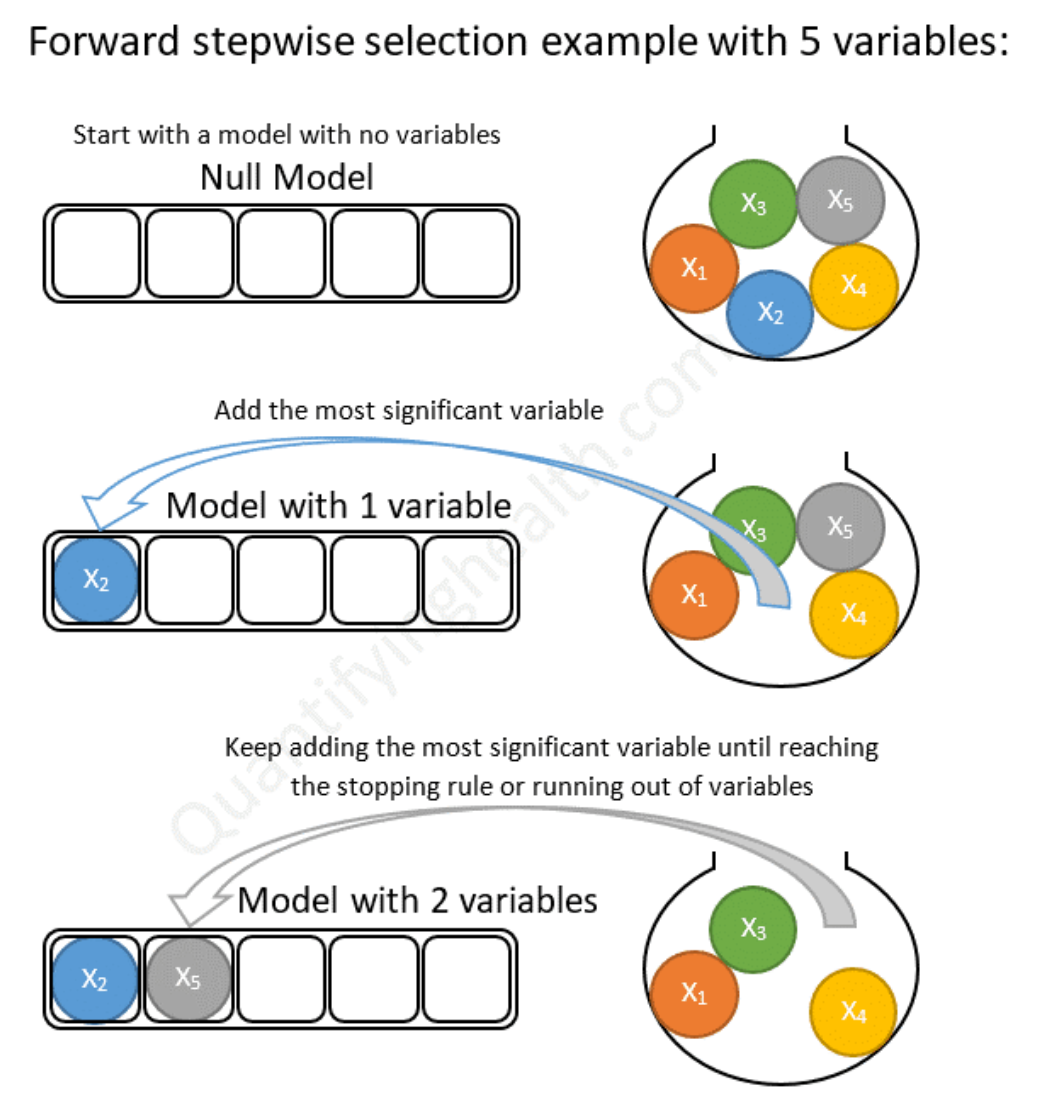

## Backward elimination

- Start with all $p$ candidate regressors in the model;
- Drop the predictor that improves your selection criterion the least;
- Continue until there is no predictor that can be dropped and result in an improvement of your selection criterion, then all the remaining predictors define your final model.

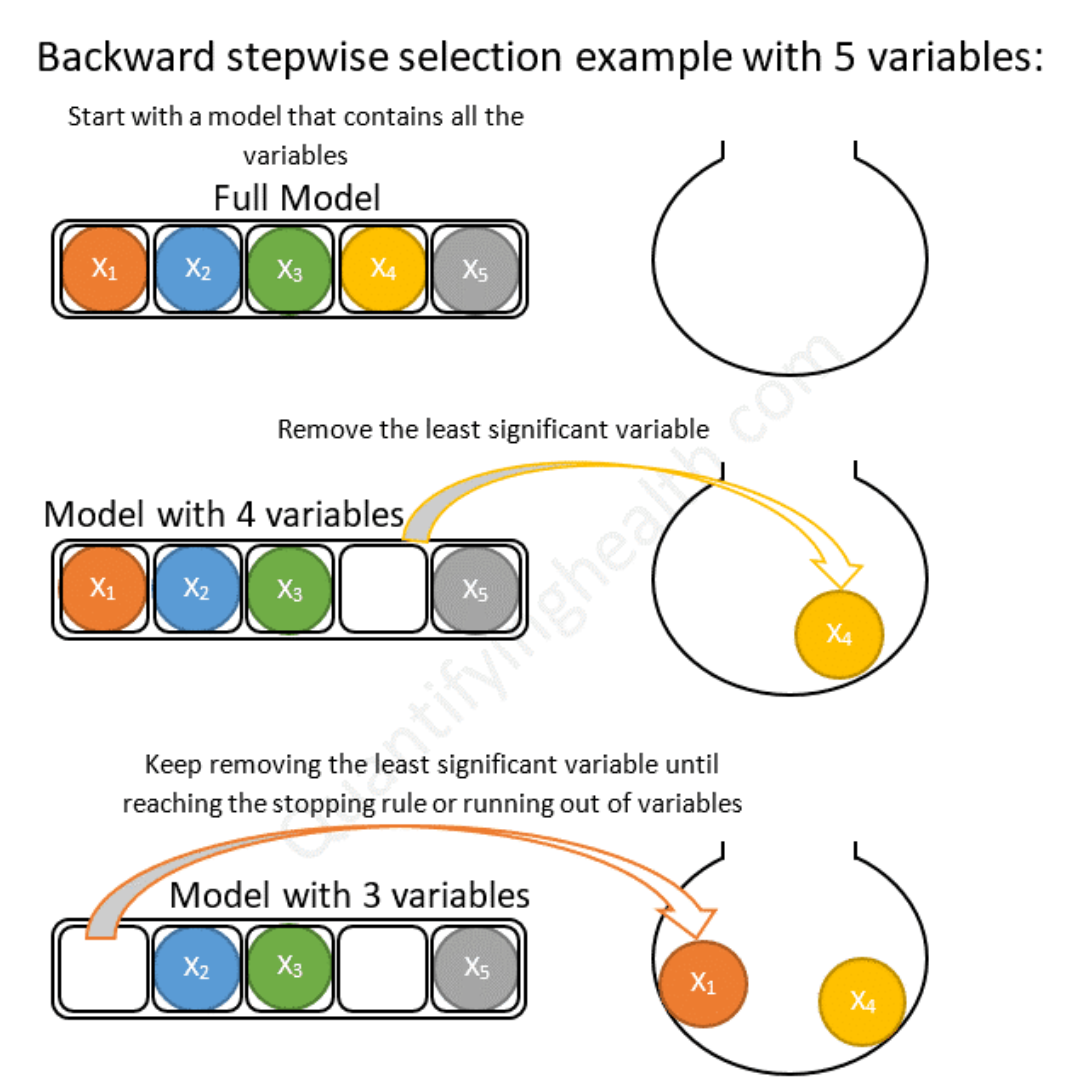

## Stepwise (forward and backward methods)
General stepwise regression techniques are usually a combination of backward elimination and forward selection, alternating between the two techniques at different steps.
1. Start with some model, typically null model (with no explanatory variables) or full model (with all variables);
2. For each variable in the current model, investigate effect of removing it.
3. Remove the least informative variable, unless this variable is nonetheless supplying significant information about the response.
4. For each variable not in the current model, investigate effect of including it.
5. Include the most statistically significant variable not currently in model (unless no significant variable exists).
6. Go to step 2. Stop only if no change in steps 2-5.

In [38]:
df = pd.read_pickle('auto_processed.zip')
lm = LinReg(df, toDrop=['make','foreign', 'rep78'])
print(df)

    one  price  mpg  headroom  trunk  weight  length  turn  displacement  \
0     1   4099   22       2.5     11    2930     186    40           121   
1     1   4749   17       3.0     11    3350     173    40           258   
3     1   4816   20       4.5     16    3250     196    40           196   
4     1   7827   15       4.0     20    4080     222    43           350   
5     1   5788   18       4.0     21    3670     218    43           231   
..  ...    ...  ...       ...    ...     ...     ...   ...           ...   
69    1   7140   23       2.5     12    2160     172    36            97   
70    1   5397   41       3.0     15    2040     155    35            90   
71    1   4697   25       3.0     15    1930     155    35            89   
72    1   6850   25       2.0     16    1990     156    36            97   
73    1  11995   17       2.5     14    3170     193    37           163   

    gear_ratio  iForeign  rep_2  rep_3  rep_4  rep_5  
0         3.58     False  False 

In [40]:
pool = {i for i in range(len(lm.df.columns))}-{0,2}
print(pool)
candidate = {0}
lm.fit(2,list(candidate))
print(lm.AIC)
minAIC = float("inf")  

{1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14}
222.48083989395857


In [42]:
for i in pool:
    candidate.add(i)
    #print(candidate)
    lm.fit(2,list(candidate))
    AIC = lm.AIC
    #print(AIC)
    if AIC < minAIC:
        minAIC = AIC
        v = i
     #   print('--------',v)
    candidate =set(candidate - {i})
candidate.add(v)
pool = pool - {v}
print(candidate,minAIC)

UFuncTypeError: Cannot cast ufunc 'inv' input from dtype('O') to dtype('float64') with casting rule 'same_kind'

In [42]:
print(candidate)
print(pool)

{0, 5}
{1, 3, 4, 6, 7, 8, 9, 10, 11, 12, 13, 14}


In [44]:
for i in pool:
    candidate.add(i)
    #print(candidate)
    lm.fit(2,list(candidate))
    AIC = lm.AIC
    #print(AIC)
    if AIC < minAIC:
        minAIC = AIC
        v = i
        print('--------',v)
    candidate =set(candidate - {i})
candidate.add(v)
pool = pool - {v}
print(candidate,minAIC)
#184.8009411542647

UFuncTypeError: Cannot cast ufunc 'inv' input from dtype('O') to dtype('float64') with casting rule 'same_kind'

In [46]:
class ModelSelection(LinReg):
    def __init__(self, df, iy, toDrop=None):
        super().__init__(df, toDrop=toDrop)
        self.iy=iy
        vset={i for i in range(len(self.df.columns))}
        self.toBeSelected=set(vset-{iy,0}) # constant interception -> 0
        self.selected={0}

    def one_step_forward(self):
        sMin = float("inf")
        toKeep = None
        for v in self.toBeSelected:
            self.selected.add(v)
            self.fit(self.iy,list(self.selected))
            #print(self.df.columns[v], self.adjR2)
            if self.AIC < sMin:
                sMin = self.AIC
                vToKeep=v
            self.selected-={v}
            
        self.selected.add(vToKeep)
        self.toBeSelected-={vToKeep}
        self.fit(self.iy,list(self.selected))
        print(self.selected,self.AIC)
        
df = pd.read_pickle('auto_processed.zip')
fms=ModelSelection(df, 2, toDrop=['make','foreign', 'rep78'])
fms.one_step_forward()

UFuncTypeError: Cannot cast ufunc 'inv' input from dtype('O') to dtype('float64') with casting rule 'same_kind'

In [46]:
fms.one_step_forward()

{0, 5, 14} 186.08603481092095


In [47]:
fms.one_step_forward()
fms.one_step_forward()
fms.one_step_forward()
fms.one_step_forward()
fms.one_step_forward()
fms.one_step_forward()

{0, 5, 10, 14} 184.8009411542647
{0, 5, 6, 10, 14} 183.48398024320028
{0, 5, 6, 9, 10, 14} 181.4890292272412
{0, 5, 6, 8, 9, 10, 14} 181.56625198797917
{0, 5, 6, 7, 8, 9, 10, 14} 181.7750747579944
{0, 5, 6, 7, 8, 9, 10, 14, 12} 181.8796248523484


In [48]:
def genData(n=100,p=5,sig=1.0):
    X = np.random.normal(0,2.0,size=(n,p))
    Y = 2.0+X.dot([0.5,1.0,1.5]+[0.0 for i in range(p-3)])+sig*np.random.normal(size=n)
    df = pd.DataFrame(X,columns=[f"X{i+1}" for i in range(p)])
    df.insert(0,"one",1.0)
    df.insert(p+1,"Y",Y)
    return df

In [52]:
n = 1000
p = 20
df = genData(n=n,p=p,sig=2)
fms=ModelSelection(df, p+1)
fms.one_step_forward()
fms.one_step_forward()
fms.one_step_forward()
fms.one_step_forward()
fms.one_step_forward()
fms.one_step_forward()
fms.one_step_forward()
fms.one_step_forward()
fms.one_step_forward()
fms.one_step_forward()

{0, 3} 2501.5034253081944
{0, 2, 3} 2217.8839670503844
{0, 1, 2, 3} 2128.060710519966
{0, 1, 2, 3, 17} 2125.6247628089313
{0, 1, 2, 3, 17, 19} 2124.1527301764895
{0, 1, 2, 3, 9, 17, 19} 2123.9405125488565
{0, 1, 2, 3, 9, 17, 19, 20} 2124.105793536809
{0, 1, 2, 3, 9, 17, 19, 20, 11} 2124.364356711322
{0, 1, 2, 3, 9, 11, 17, 19, 20, 18} 2124.6709050497866
{0, 1, 2, 3, 8, 9, 11, 17, 18, 19, 20} 2125.0595607910755


In [53]:
class ModelSelectionOptimal(LinReg):
    def __init__(self, df, iy, toDrop=None):
        super().__init__(df, toDrop=toDrop)
        self.iy=iy
        vset={i for i in range(len(self.df.columns))}
        self.toBeSelected=set(vset-{iy,0})
        self.selected={0}

    def optimal_forward(self):
        currentAIC = float("inf")
        toKeep = None
        self.fit(self.iy,list(self.selected))
        p_current = len(self.toBeSelected)
        delta_p = 1
        while delta_p>0 and p_current>0:
            for v in self.toBeSelected:
                self.selected.add(v)
                self.fit(self.iy,list(self.selected))
                #print(self.df.columns[v], self.adjR2)
                if self.AIC < currentAIC:
                    currentAIC = self.AIC
                    vToKeep=v
                self.selected-={v}
            self.selected.add(vToKeep)
            self.toBeSelected-={vToKeep}
            self.fit(self.iy,list(self.selected))
            p_past,p_current = p_current,len(self.toBeSelected)
            delta_p = p_past-p_current
            #print(self.selected,self.AIC)

In [55]:
#n = 1000
#p = 20
#df = genData(n=n,p=p,sig=2)
fms=ModelSelectionOptimal(df, p+1)
fms.optimal_forward()
print(f"The optimal modelis {fms.selected} and its AIC is {fms.AIC}")

The optimal modelis {0, 1, 2, 3, 9, 17, 19} and its AIC is 2123.9405125488565
